In [1]:
%matplotlib widget
import os, sys
import matplotlib
import matplotlib.pyplot as plt
print(os.getpid())

11356


In [246]:
sys.path.append(r'../..')
from ChromAn import src
from ChromAn.src.file_io.dax_process import DaxProcesser
from ChromAn.src.visual_tools.interactive import imshow_mark_3d

In [288]:
image_folder = r'E:\Data\20230809-F133-4T1_T7-3h\Tests'
#image_folder = r'\\10.245.74.212\Chromatin_NAS_2\Pu\20230630-4T1cell_methanol\H0M1'
image_basenames = sorted([_fl for _fl in os.listdir(image_folder) if _fl.split(os.extsep)[-1] =='dax'])
print(image_folder)
print(image_basenames)

E:\Data\20230809-F133-4T1_T7-3h\Tests
['zscan_748_637_545_477_405_s13_n1000_5Hz_0001.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0002.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0003.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0004.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0005.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0006.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0007.dax', 'zscan_748_637_545_477_405_s13_n1000_5Hz_0008.dax']


In [297]:
image_filename = os.path.join(image_folder, image_basenames[0])
print(image_filename)
# load image
daxp = DaxProcesser(image_filename,
                    CorrectionFolder=r'\\wi-bigdata\weissman_imaging\puzheng\Corrections',
                    FiducialChannel='405',
                    #Channels=['748', '637', '545', '477', '405'],
                   )
daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

E:\Data\20230809-F133-4T1_T7-3h\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0001.dax
Initialize DaxProcesser for file:E:\Data\20230809-F133-4T1_T7-3h\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0001.dax
- New save file: E:\Data\20230809-F133-4T1_T7-3h\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0001_processed.hdf5
-- all used channels: ['748', '637', '545', '477', '405']
-- single image size: [  13 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 0.442s.


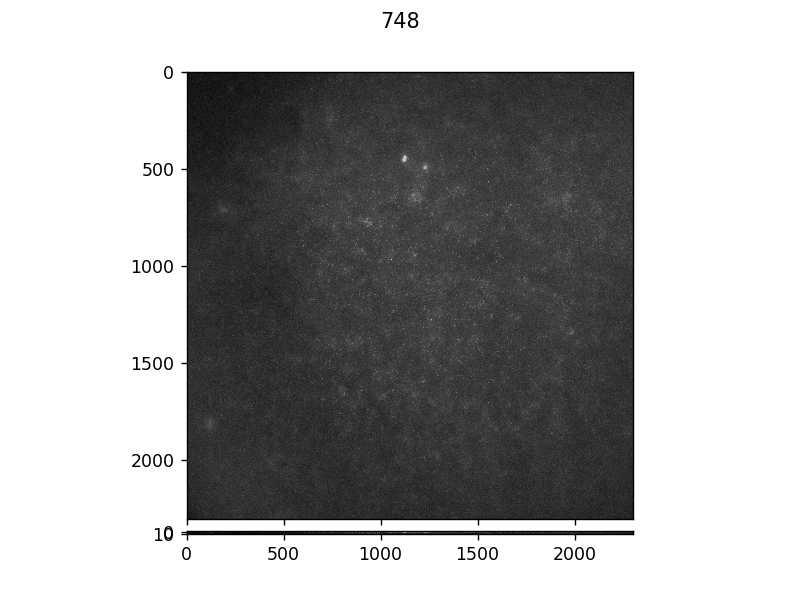

In [298]:
%matplotlib notebook
f = plt.figure(dpi=125)
imshow_mark_3d([getattr(daxp, f"im_{_ch}") for _ch in daxp.channels][:], 
                fig=f,
                image_names=daxp.channels, 
                min_max_default=[1000,10000],
                )


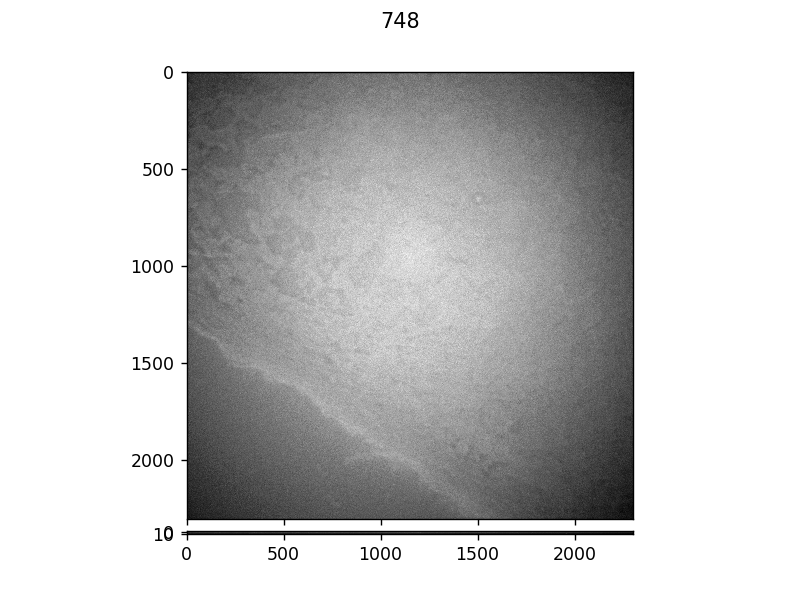

In [290]:
%matplotlib notebook
f = plt.figure(dpi=125)
imshow_mark_3d([getattr(daxp, f"im_{_ch}") for _ch in daxp.channels][:], 
                fig=f,
                image_names=daxp.channels, 
                min_max_default=[1000,10000],
                )


In [275]:
# synthesize RGB image
import numpy as np
r_ch = '637'
g_ch = '545'
b_ch = '405'

In [276]:
_sel_ims = [getattr(daxp, f"im_{r_ch}"), getattr(daxp, f"im_{g_ch}"), getattr(daxp, f"im_{b_ch}")]

In [277]:
np.iinfo(np.uint8).max

255

In [284]:
def _rescaling(im, vmin=None, vmax=None):
    if vmin is None:
        vmin = np.min(im)
    if vmax is None:
        vmax = np.max(im)
    _res_im = np.clip(im, vmin, vmax)
    _res_im = (_res_im - vmin) / (vmax - vmin)
    _res_im = (_res_im * np.iinfo(np.uint8).max ).astype(np.uint8)
    return _res_im
sel_im_proj = np.array([_rescaling(_img.max(0), vmin=300, vmax=5000) 
                        for _img in _sel_ims]).transpose(1,2,0)

Text(0.5, 1.0, 'r:637, g:545, b:405')

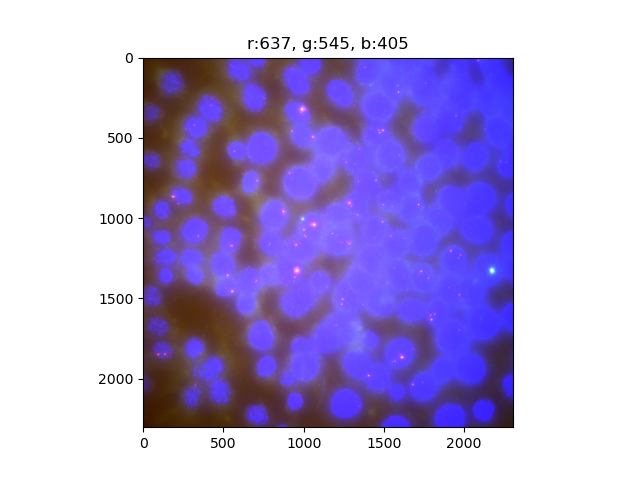

In [287]:
plt.figure()
plt.imshow(sel_im_proj, )
plt.title(f"r:{r_ch}, g:{g_ch}, b:{b_ch}")

Text(0.5, 1.0, 'DNA-FISH-')

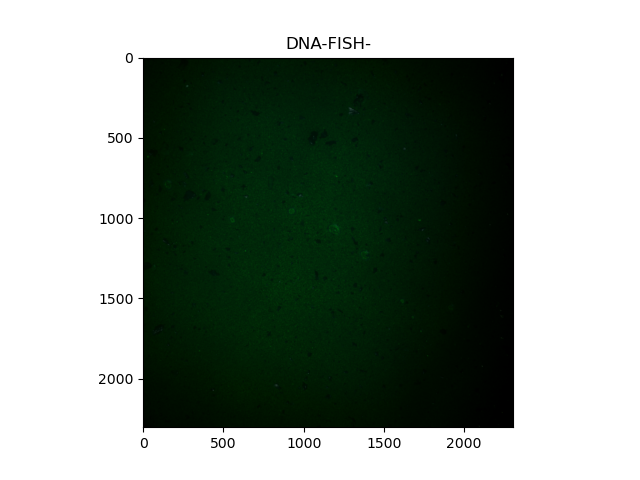

In [192]:
plt.figure()
plt.imshow(sel_im_proj, )
plt.title("DNA-FISH-")

Text(0.5, 1.0, 'DNA-FISH-')

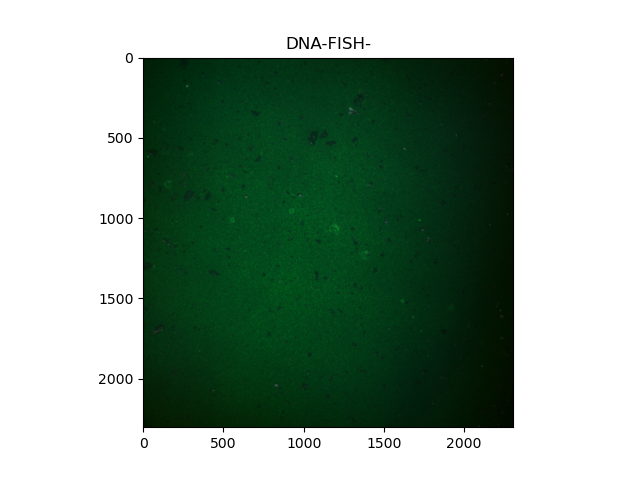

In [173]:
plt.figure()
plt.imshow(sel_im_proj, )
plt.title("DNA-FISH-")

In [53]:
ref_image_filename = os.path.join(image_folder, image_basenames[-2])
print(ref_image_filename)
# load image
ref_daxp = DaxProcesser(ref_image_filename,
                        CorrectionFolder=r'\\wi-bigdata\weissman_imaging\puzheng\Corrections',
                        FiducialChannel='405',
                        Channels=['748', '637', '545', '477', '405'],
                        )
ref_daxp._load_image()
# corrections
#daxp._corr_illumination()
#daxp._corr_bleedthrough()
#daxp._corr_hot_pixels()

E:\Data\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0006.dax
Initialize DaxProcesser for file:E:\Data\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0006.dax
- New save file: E:\Data\Tests\zscan_748_637_545_477_405_s13_n1000_5Hz_0006_processed.hdf5
-- single image size: [  13 2304 2304]
- Loaded images for channels:['748', '637', '545', '477', '405'] in 0.411s.


In [54]:
drift = daxp._calculate_drift(RefImage=ref_daxp.im_405, FiducialChannel=None, overwrite=True)

+ Calculate drift with fiducial_channel: 405
-- start aligning given source image to given reference image.
-- drift 0: [-4.0000e-02  5.7550e+01 -2.3228e+02] in 0.813s.
-- drift 1: [-3.0000e-02  5.7700e+01 -2.3163e+02] in 0.795s.
-- drift 2: [-4.0000e-02  5.8210e+01 -2.3227e+02] in 0.774s.
--- drifts for crops:[0 1 2] pass the thresold, exit cycle.


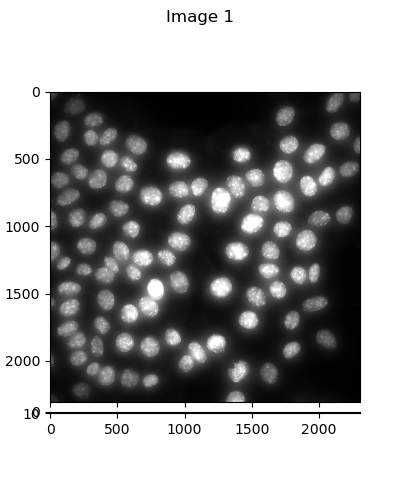

In [55]:
imshow_mark_3d([daxp.im_405, ref_daxp.im_405])

In [56]:
global_pos = daxp._FindGlobalPosition(daxp.filename)

In [57]:
ref_global_pos = ref_daxp._FindGlobalPosition(ref_daxp.filename)

In [58]:
(global_pos - ref_global_pos)

array([ 5.05, 24.9 ])

In [59]:
(global_pos - ref_global_pos) / daxp.drift[-2:]

array([ 0.08734002, -0.10729984])

In [60]:
daxp.drift[-2:]

array([  57.82, -232.06])

In [61]:
(global_pos - ref_global_pos)

array([ 5.05, 24.9 ])

# Test interactive

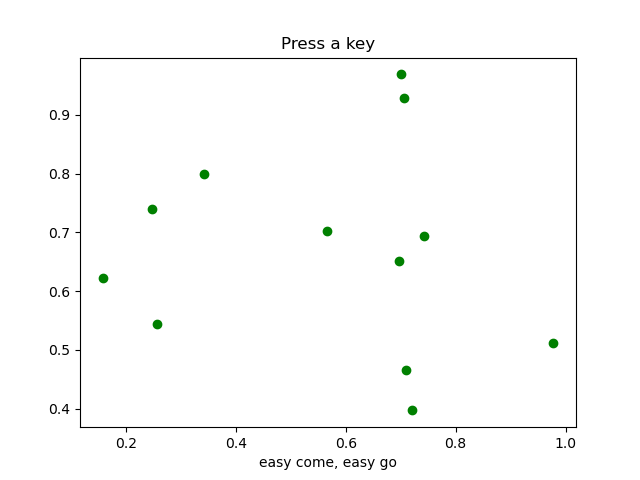

In [17]:
import sys
import numpy as np
import matplotlib.pyplot as plt


def on_press(event):
    print('press', event.key)
    sys.stdout.flush()
    if event.key == 'x':
        visible = xl.get_visible()
        xl.set_visible(not visible)
        fig.canvas.draw()


# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

fig.canvas.mpl_connect('key_press_event', on_press)

ax.plot(np.random.rand(12), np.random.rand(12), 'go')
xl = ax.set_xlabel('easy come, easy go')
ax.set_title('Press a key')
plt.show()